# Análise Census



Fonte: https://archive.ics.uci.edu/dataset/2/adult

---


## Pré - processamento dos dados

### Importação e atualização de bibliotecas

In [ ]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Exploração dos dados

In [ ]:
# Importando base de dados
base_census = pd.read_csv('/content/drive/MyDrive/Udemy/ML/Data_pkl/census.csv')
base_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
# Descrição estatística da base
base_census.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Analisando registros faltantes
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

### Visualização dos Dados


In [ ]:
# Análise de Renda
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

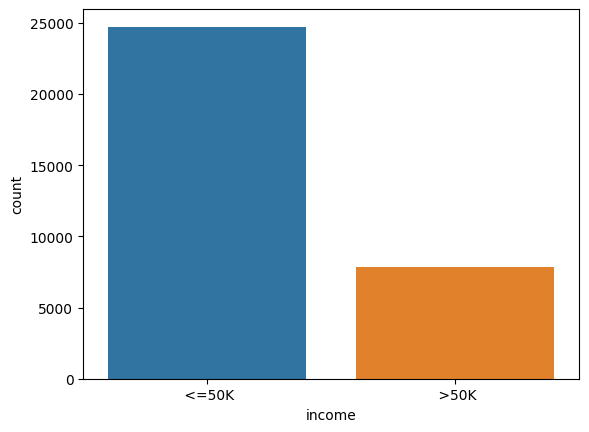

In [ ]:
# Visualização de Renda
sns.countplot(x=base_census['income']);

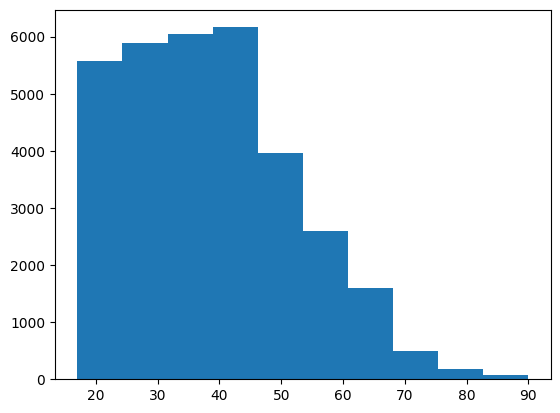

In [ ]:
# Visualização de faixa etária
plt.hist(x = base_census['age']);

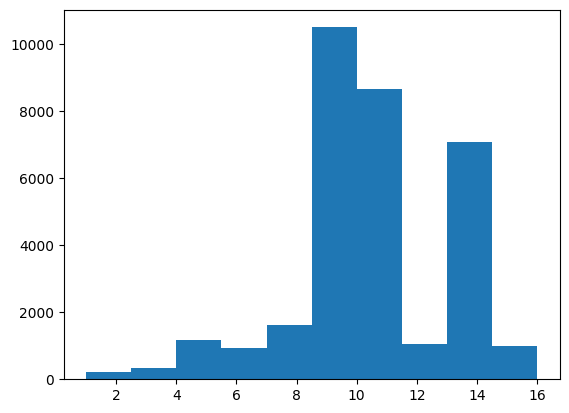

In [ ]:
# Visualização de nível educação
plt.hist(x= base_census['education-num']);

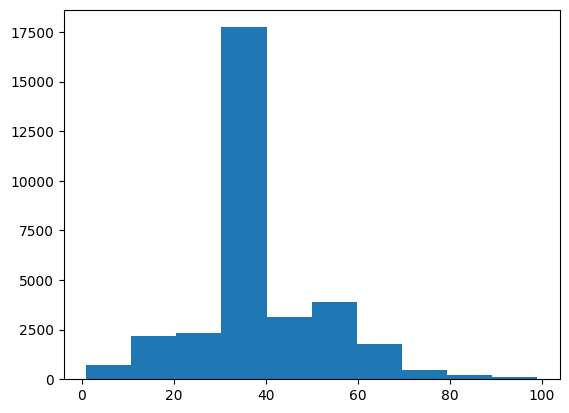

In [ ]:
# Visualização horas trabalhadas por semana
plt.hist(x=base_census['hour-per-week']);

In [ ]:
# Visualização em mapeamento dos atributos idade e classe de trabalhador
grafico = px.treemap(base_census, path=['workclass', 'age']);
grafico.show()

In [ ]:
# Visualização em mapeamento dos atributos ocupação e relacionamento
grafico = px.treemap(base_census, path=['occupation', 'relationship'])
grafico.show()

In [ ]:
# Visualização paralela dos atributos ocupação e relacionamento
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

In [ ]:
# Visualização paralela dos atributos educação e renda
grafico = px.parallel_categories(base_census, dimensions=['education', 'income'])
grafico.show()

### Divisão entre previsores e classe

In [ ]:
# Previsores
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
# Classe
y_census = base_census.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### Tratamento de atributos categóricos para numéricos

LabelEncoder

In [ ]:
# Importando biblioteca
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Criando variáveis (instanciando objeto da classe LabelEncoder )
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [ ]:
# Aplicação da função LabelEncoder
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

OneHotEncoder

In [ ]:
# Importando biblioteca
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
# Codificação
Onehotencoder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),[1,3,5,6,7,8,9,13])], remainder= 'passthrough')

In [ ]:
# Transformação
X_census = Onehotencoder_census.fit_transform(X_census).toarray()

In [ ]:
# Consulta
X_census

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

### Esclanonamento dos valores

In [ ]:
# Importando biblioteca e fazendo escalonamento
from sklearn.preprocessing import StandardScaler
scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [ ]:
# Consultando
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

### Divisão das bases em treinamento e teste

In [ ]:
# Importanto biblioteca de treinamento
from sklearn.model_selection import train_test_split

In [ ]:
# Definição das bases de treinamento e teste
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size = 0.15, random_state = 0 )

In [ ]:
# Consultando formato treinamento
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
# Consultando formato teste
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
# Salvando variáveis
import pickle
with open('/content/drive/MyDrive/Udemy/ML/Data_pkl/census.pkl',mode='wb') as f:
  pickle.dump([X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste], f)

## Algoritmos de Classifição

### Naive Bayes - 47.6%

In [ ]:
# Importanto variáveis
import pickle
with open('/content/drive/MyDrive/Udemy/ML/Data_pkl/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
# Consultando formato treinamento
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
# Consultando formato teste
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
# Treinando
from sklearn.naive_bayes import GaussianNB
naive_census = GaussianNB( )
naive_census.fit(X_census_treinamento, y_census_treinamento)

GaussianNB()

In [ ]:
# Previsão teste
previsoes = naive_census.predict(X_census_teste)
previsoes

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [ ]:
# Base real teste
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
# Comparação entre base teste vs. previsoes obs:não executar escalonamento neste caso melhora a precisão do algorismo
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

0.4767656090071648

In [ ]:
# Visualização biblioteca
# Registros de pessoas que ganham <=50k e foram classificados correntamente = 1172; Registros de pessoas que ganham <=50k e foram classificados ganhando >50k = 2521
# Registros de pessoas que ganham >50k e foram classificados correntamente = 1157; Registros de pessoas que ganham >50k e foram classificados ganhando <=50k = 35
from sklearn.metrics import confusion_matrix
confusion_matrix(y_census_teste, previsoes)

array([[1172, 2521],
       [  35, 1157]])

0.4767656090071648

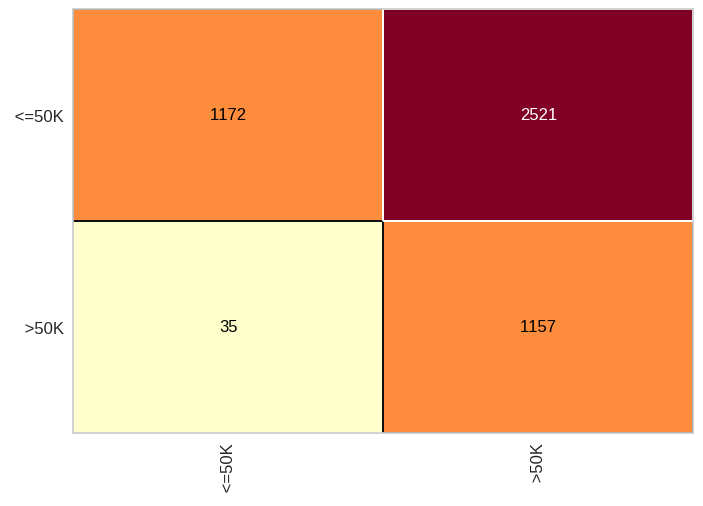

In [ ]:
# Visualização de outra biblioteca
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
# Visualização de outra função
from sklearn.metrics import classification_report
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



### Árvore de Decisão - 81.0%

In [ ]:
# Importanto variáveis
import pickle
with open('/content/drive/MyDrive/Udemy/ML/Data_pkl/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
# Consultando formato treinamento
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
# Consultando formato teste
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
# Treinando
from sklearn.tree import DecisionTreeClassifier
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Previsão teste
previsoes = arvore_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
# Base real teste
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
# Comparação entre base teste vs. previsoes
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

0.8104401228249745

In [ ]:
# Visualização biblioteca
# Registros de pessoas que ganham <=50k e foram classificados correntamente = 3227; Registros de pessoas que ganham <=50k e foram classificados ganhando >50k = 466
# Registros de pessoas que ganham >50k e foram classificados correntamente = 732; Registros de pessoas que ganham >50k e foram classificados ganhando <=50k = 460
from sklearn.metrics import confusion_matrix
confusion_matrix(y_census_teste, previsoes)

array([[3227,  466],
       [ 460,  732]])

0.8104401228249745

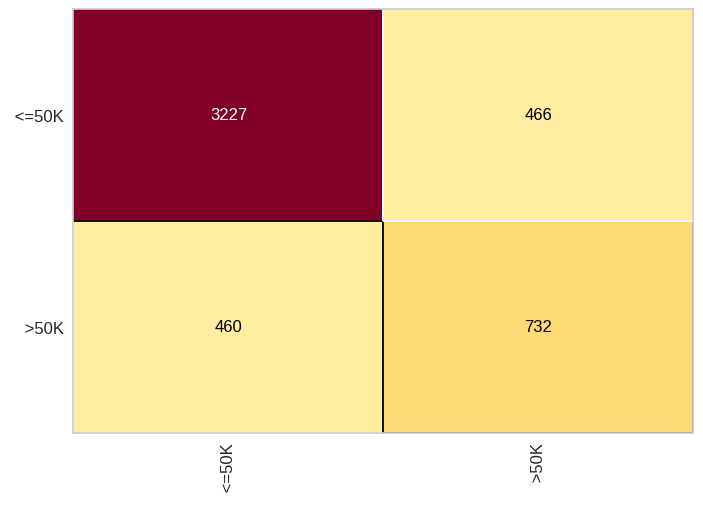

In [ ]:
# Visualização de outra biblioteca
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
# Visualização de outra biblioteca
from sklearn.metrics import classification_report
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



### Random Forest - 85.0%

In [ ]:
# Importanto variáveis
import pickle
with open('/content/drive/MyDrive/Udemy/ML/Data_pkl/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
# Consultando formato treinamento
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [ ]:
# Consultando formato teste
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [ ]:
# criando random forest e instanciado classe random classifier
# Usará entropia como exemples anteriores e impureza de Gini por default
from sklearn.ensemble import RandomForestClassifier
random_forest_census = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

In [ ]:
# Treinando
random_forest_census.fit(X_census_treinamento, y_census_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
# Previsão teste
previsoes = random_forest_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
# Base real teste
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [ ]:
# Comparação entre base teste vs. previsoes
from sklearn.metrics import accuracy_score
accuracy_score(y_census_teste, previsoes)

0.8507676560900717

In [ ]:
# Visualização biblioteca
# Registros de pessoas que ganham <=50k e foram classificados correntamente = 3420; Registros de pessoas que ganham <=50k e foram classificados ganhando >50k = 273
# Registros de pessoas que ganham >50k e foram classificados correntamente = 736; Registros de pessoas que ganham >50k e foram classificados ganhando <=50k = 456
from sklearn.metrics import confusion_matrix
confusion_matrix(y_census_teste, previsoes)

array([[3420,  273],
       [ 456,  736]])

0.8507676560900717

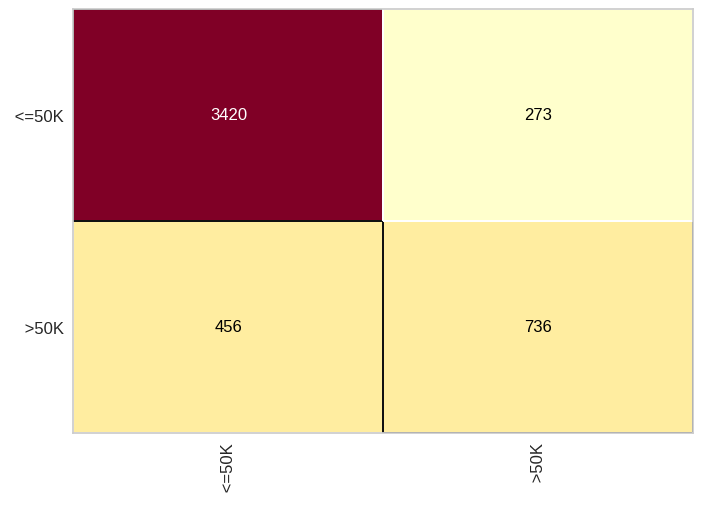

In [ ]:
# Visualização de outra biblioteca
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
# Visualização de outra biblioteca
from sklearn.metrics import classification_report
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885



###Indução de Regras - 81.0%


Obs: Análise realizada na interface da ferramenta Orange data mining.


###Majority Learner - *75.9*%

Obs: Os algoritimos devem realizar uma acurácia acima deste %, caso contrário, recomenda-se realizar a classificação dos registros de acordo com a classe predominante.

In [ ]:
!pip install orange3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.3/512.3 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.0/262.0 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.0/961.0 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 44.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import Orange
base_census = Orange.data.Table('/content/drive/MyDrive/Udemy/ML/Data_pkl/census_regras.csv')

In [ ]:
base_census.domain

[age, workclass, final-weight, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loos, hour-per-week, native-country | income]

In [ ]:
majority = Orange.classification.MajorityLearner()

ImportError: ignored

In [ ]:
previsoes = Orange.evaluation.testing.TestOnTestData(base_census, base_census,[majority])

In [ ]:
Orange.evaluation.CA(previsoes)

In [ ]:
from collections import Counter
Counter(str(registro.get_class()) for registro in base_census)

In [ ]:
24720/(24720+7841)

###KNN - 82.9%

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import pickle
with open('/content/drive/MyDrive/Udemy/ML/Data_pkl/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
knn_census = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
knn_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = knn_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

###Regressão logística - 84.9%

In [ ]:
import pickle
with open('/content/drive/MyDrive/Udemy/ML/Data_pkl/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_census = LogisticRegression(random_state=1)
logistic_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
logistic_census.intercept_

In [ ]:
logistic_census.coef_

In [ ]:
previsoes = logistic_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(logistic_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

###Maquinas de vetores de suporte (SVM) - 85.0%

In [ ]:
from sklearn.svm import SVC

In [ ]:
import pickle
with open('/content/drive/MyDrive/Udemy/ML/Data_pkl/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
svm_census = SVC(kernel='linear', random_state=1)
svm_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = svm_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))

### Redes Neurais - 81.6%

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
import pickle
with open('/content/drive/MyDrive/Udemy/ML/Data_pkl/census.pkl', 'rb') as f:
  X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [ ]:
X_census_treinamento.shape, y_census_treinamento.shape

In [ ]:
X_census_teste.shape, y_census_teste.shape

In [ ]:
# Calculo da quantidade de camadas ocultas
(108+1)/2

In [ ]:
rede_neural_census = MLPClassifier( max_iter=1000, verbose=True, tol=0.00001, solver='adam', activation='relu', hidden_layer_sizes=(55,55))
rede_neural_census.fit(X_census_treinamento, y_census_treinamento)

In [ ]:
previsoes = rede_neural_census.predict(X_census_teste)
previsoes

In [ ]:
y_census_teste

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rede_neural_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [ ]:
print(classification_report(y_census_teste, previsoes))